1

In [ ]:
!pip install numpy==1.24.4 gensim==4.3.1 scipy==1.10.1
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-50")
print(model.most_similar(positive=['king', 'woman'], negative=['man']))
# arithmetic operations (e.g., king - man + woman ≈ queen)
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print(f"'king' + 'man' - 'woman' is closest to: {result[0]}")

[==================================================] 100.0% 66.0/66.0MB downloaded
[('queen', 0.8523604273796082), ('throne', 0.7664334177970886), ('prince', 0.7592144012451172), ('daughter', 0.7473883628845215), ('elizabeth', 0.7460219860076904), ('princess', 0.7424570322036743), ('kingdom', 0.7337412238121033), ('monarch', 0.721449077129364), ('eldest', 0.7184861898422241), ('widow', 0.7099431157112122)]
'king' + 'man' - 'woman' is closest to: ('queen', 0.8523604273796082)


2

[==================================================] 100.0% 128.1/128.1MB downloaded


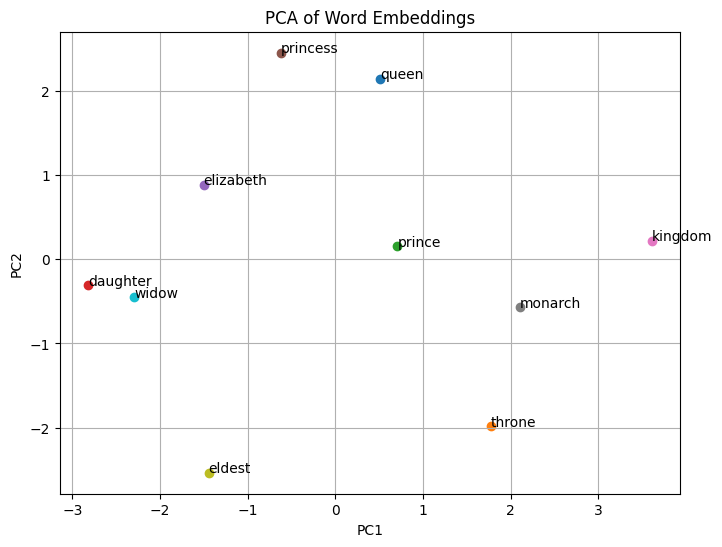

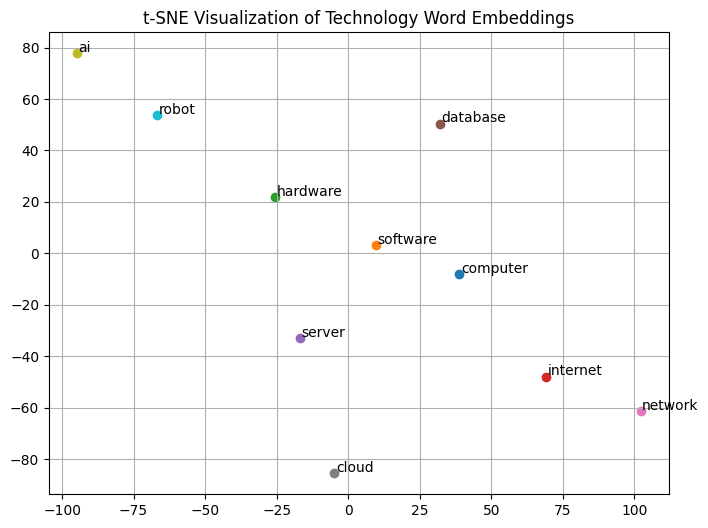

Top 5 words similar to 'network':
  networks (0.90)
  cable (0.81)
  channel (0.78)
  broadcast (0.74)
  channels (0.74)


In [ ]:
!pip install numpy==1.24.4 gensim==4.3.1 scipy==1.10.1
import gensim.downloader as api
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

model = api.load("glove-wiki-gigaword-100")

words = ['queen', 'throne', 'prince', 'daughter', 'elizabeth', 'princess', 'kingdom', 'monarch', 'eldest', 'widow']

vectors = [model[word] for word in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.title("PCA of Word Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

tech_words = ["computer", "software", "hardware", "internet", "server", "database", "network", "cloud", "ai", "robot"]

vectors = np.array([model[word] for word in tech_words])

tsne = TSNE(n_components=2, random_state=0, perplexity=3)
reduced = tsne.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(tech_words):
    x, y = reduced[i, 0], reduced[i, 1]
    plt.scatter(x, y)
    plt.annotate(word, (x + 0.5, y + 0.5))
plt.title("t-SNE Visualization of Technology Word Embeddings")
plt.grid(True)
plt.show()

def find_similar_words(word, topn=5):
    if word in model:
        similar = model.most_similar(word, topn=topn)
        print(f"Top {topn} words similar to '{word}':")
        for sim_word, score in similar:
            print(f"  {sim_word} ({score:.2f})")
    else:
        print(f"Word '{word}' not found in vocabulary.")

find_similar_words("network")


3

In [ ]:
!pip install numpy==1.24.4 gensim==4.3.1 scipy==1.10.1
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

sentences = [
    "This is a legal document about contracts.",
    "The court will review the legal case.",
    "Medical professionals require specific training.",
    "This is a medical report about the patient."
]

tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]
model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, workers=4, epochs=10)
print(model.wv.most_similar('legal'))

[('case', 0.19041602313518524), ('document', 0.045007091015577316), ('contracts', -0.010094511322677135), ('the', -0.014259982854127884), ('report', -0.02316688746213913), ('court', -0.043792981654405594), ('will', -0.044073157012462616), ('review', -0.09419942647218704), ('patient', -0.12276068329811096), ('require', -0.14990590512752533)]


4

In [ ]:
import gensim.downloader as api
model=api.load("glove-wiki-gigaword-50")
def enrich_prompt (prompt, num_similar = 3):
  words = prompt.split()
  enriched_words = []
  for word in words:
    try:
      similar_words = [w for w, _ in model.most_similar(word, topn=num_similar)]
      enriched_words.append(word + "(" +",".join(similar_words) + ")")
    except KeyError:
      enriched_words.append(word)
  return ' '.join(enriched_words)
original_prompt = "Write a story about a Dog."
enriched_prompt = enrich_prompt(original_prompt)
print("Original Prompt: ",original_prompt)
print("Enriched Prompt: ",enriched_prompt)

Original Prompt:  Write a story about a Dog.
Enriched Prompt:  Write a(another,an,one) story(stories,book,tale) about(than,there,more) a(another,an,one) Dog.


5

In [ ]:
!pip install numpy==1.24.4 gensim==4.3.1 scipy==1.10.1 transformers tensorflow jax
import gensim.downloader as api
from transformers import pipeline
import nltk
import string
import random
from nltk.tokenize import sent_tokenize

word_vectors = api.load("glove-wiki-gigaword-100")

def get_similar_words(seed_word, top_n=5):
  try:
    similar_words = word_vectors.most_similar(seed_word, topn=top_n)
    return [word[0] for word in similar_words]
  except KeyError:
    print(f"'{seed_word}' not found in vocabulary. Try another word.")
    return []


def generate_sentence(seed_word, similar_words):
  sentence_templates=[
      f"The {seed_word} was surrounded by {similar_words[0]} and {similar_words[1]}.",
      f"People often associate {seed_word} with {similar_words[2]} and {similar_words[3]}.",
      f"In the land of {seed_word}, {similar_words[4]} was a common sight.",
      f"A story about {seed_word} would be incomplete without {similar_words[1]} and {similar_words[3]}.",
      ]
  return random.choice(sentence_templates)

def generate_paragraph(seed_word):
  similar_words = get_similar_words(seed_word, top_n=5)

  if not similar_words:
    return "Could not generate a paragraph. Try another seed word."

  paragraph = [generate_sentence(seed_word, similar_words) for _ in range(4)]
  return " ".join(paragraph)

seed_word = input("Enter a seed word: ")
paragraph = generate_paragraph(seed_word)
print("\nGenerated Paragraph:\n")
print(paragraph)

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled

6

In [ ]:
!pip install transformers tensorflow jax
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentences = [
    "This is a great product! I love it.",
    "I am very disappointed with this service.",
    "The weather is not okay today.but still gotta adjust the place"
]

results = classifier(sentences)
for sentence, result in zip(sentences, results):
    print(f"'{sentence}' -> Label: {result['label']}, Score: {result['score']:.3f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


'This is a great product! I love it.' -> Label: POSITIVE, Score: 1.000
'I am very disappointed with this service.' -> Label: NEGATIVE, Score: 1.000
'The weather is not okay today.but still gotta adjust the place' -> Label: NEGATIVE, Score: 0.990


7

In [ ]:
!pip install transformers tensorflow jax
from transformers import pipeline

summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-6-6")

text = """
Artificial intelligence (AI) is intelligence demonstrated by machines,
 as opposed to the natural intelligence displayed by humans and animals.
Leading AI textbooks define the field as the study of "intelligent agents":
 any device that perceives its environment and takes actions that maximize
 its chance of successfully achieving its goals.
Colloquially, the term "artificial intelligence"
is often used to describe machines that mimic "cognitive"
functions that humans associate with the human mind,
such as "learning" and "problem solving".
"""

summary = summarizer(text, max_length=50, min_length=10, do_sample=False)
print(summary[0]['summary_text'])

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/460M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/460M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


Leading AI textbooks define the field as the study of "intelligent agents" "Artificial intelligence" is often used to describe machines that mimic "cognitive" functions that humans associate with the human mind .


8

In [ ]:
!pip install langchain cohere langchain-community google-colab
import cohere
import getpass
from langchain import PromptTemplate
from langchain.llms import Cohere
from google.colab import auth
from google.colab import drive

auth.authenticate_user()
drive.mount('/content/drive')

file_path = "/content/genai.txt"

try:
  with open(file_path, "r", encoding="utf-8") as file:
    text_content = file.read()
  print("File loaded successfully!")
except Exception as e:
  print("Error loading file:", str(e))

COHERE_API_KEY = getpass.getpass("duNcdh7cDgza0an74Ap0mUfW5odWmygTm4GOqyaW")

cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")

template = """
You are an AI assistant helping to summarize and analyze a text document.
Here is the document content:
{text}
* Summary:
- Provide a concise summary of the document.
* Key Takeaways:
- List 3 important points from the text.
* Sentiment Analysis:
- Determine if the sentiment of the document is Positive, Negative, or Neutral.
"""

prompt_template = PromptTemplate(input_variables=["text"], template=template)

formatted_prompt = prompt_template.format(text=text_content)
response = cohere_llm.predict(formatted_prompt)

print("\n **Formated Output** ")
print(response)

Mounted at /content/drive
File loaded successfully!
duNcdh7cDgza0an74Ap0mUfW5odWmygTm4GOqyaW··········


<ipython-input-5-0b67a3eae8e8>:23: LangChainDeprecationWarning: The class `Cohere` was deprecated in LangChain 0.1.14 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-cohere package and should be used instead. To use it run `pip install -U :class:`~langchain-cohere` and import as `from :class:`~langchain_cohere import Cohere``.
  cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")
<ipython-input-5-0b67a3eae8e8>:40: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = cohere_llm.predict(formatted_prompt)



 **Formated Output** 
 Certainly! Here is your prompt completed to synthesize the given text document 

* Summary:
Generative AI is a branch of AI that produces new content such as text, images, audio, and video, by learning patterns from existing data. 

* Key Takeaways:
1. Generative AI creates new content through existing data learning patterns. 
2. It uses transformer architectures and generative adversarial networks to generate various human-like content. 
3. These technologies can be used for various modalities, including text, image, audio, and video. 

* Sentiment Analysis:
The sentiment of the document is Positive due to the exciting potential of Generative AI to create new content. 

I hope this helps! Let me know if you have any other prompt-related inquiries. 


9

In [ ]:
!pip install wikipedia-api pydantic
from pydantic import BaseModel
from typing import List, Optional
import wikipediaapi
from IPython.display import display

class InstitutionDetails(BaseModel):
    founder: Optional[str]
    founded: Optional[str]
    branches: Optional[List[str]]
    number_of_employees: Optional[int]
    summary: Optional[str]

def fetch_institution_details(institution_name: str) -> InstitutionDetails:
    user_agent = "MyJupyterNotebook/1.0 (contact: myemail@example.com)"
    wiki_wiki = wikipediaapi.Wikipedia(user_agent=user_agent, language='en')

    page = wiki_wiki.page(institution_name)
    if not page.exists():
        raise ValueError(f"The page for '{institution_name}' does not exist on Wikipedia.")

    founder = None
    founded = None
    branches = []
    number_of_employees = None

    summary = page.summary[:500]

    infobox = page.text.split('\n')
    for line in infobox:
        if 'Founder' in line:
            founder = line.split(':')[-1].strip()
        elif 'Founded' in line:
            founded = line.split(':')[-1].strip()
        elif 'Branches' in line:
            branches = [branch.strip() for branch in line.split(':')[-1].split(',')]
        elif 'Number of employees' in line:
            try:
                number_of_employees = int(line.split(':')[-1].strip().replace(',', ''))
            except ValueError:
                number_of_employees = None

    return InstitutionDetails(
        founder=founder,
        founded=founded,
        branches=branches if branches else None,
        number_of_employees=number_of_employees,
        summary=summary
    )

def display_institution_details(details: InstitutionDetails):
    print(f"Founder: {details.founder or 'N/A'}")
    print(f"Founded: {details.founded or 'N/A'}")
    print(f"Branches: {', '.join(details.branches) if details.branches else 'N/A'}")
    print(f"Number of Employees: {details.number_of_employees or 'N/A'}")
    print(f"Summary: {details.summary or 'N/A'}")

institution_name = input("Enter the Institution name you want to search:  ")
try:
  details = fetch_institution_details(institution_name)
  display_institution_details(details)
except ValueError as e:
  print(e)



  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15384 sha256=13605847ef04eac4aca96e735bbe72dd94abed070792d0c82bce12d3914bff6b
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd5aeb8c82b957289f2f3ab2251febeae5c2860
Successfully built wikipedia-api
Enter the Institution name you want to search:  The Oxford College of Engineering
Founder: N/A
Founded: Founded in 1974 by Sri S Narasa Raju, the Oxford Educational Institutions is the brain child of the Children's Education Society. The college is set in a 10.5 acres campus and is situated in Bommanahalli, Bengaluru along National Highway N.H. 7. The main Oxford institution is located J.P. Nagar, Bangalore, India.
Branches: N/A
Number of Employees: N/A
Summary: The Oxford College of Engineering is a college in Bangalore, India, under the VTU Visvesvaraya Technological University recognized by the Government of Karnataka and approved by the All In

10

In [ ]:
!pip install langchain pydantic cohere wikipedia-api langchain-community
from langchain import PromptTemplate, LLMChain
from langchain.llms import Cohere
from pydantic import BaseModel
from typing import Optional
import wikipediaapi
import getpass

COHERE_API_KEY = getpass.getpass('your api key')
cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")

def fetch_ipc_summary():
    user_agent = "IPCChatbot/1.0 (contact: kelvinprabhu2071@gmail.com)"
    wiki_wiki = wikipediaapi.Wikipedia(user_agent=user_agent, language='en')
    page = wiki_wiki.page("Indian Penal Code")

    if not page.exists():
        raise ValueError("The Indian Penal Code page does not exist on Wikipedia.")
    return page.text[:5000]

ipc_content = fetch_ipc_summary()

class IPCResponse(BaseModel):
  section: Optional[str]
  explanation: Optional[str]

prompt_template = PromptTemplate(
    input_variables=["question"],
    template="""
       You are a legal advisor chatbot with expertise in the Indian Penal Code (IPC).
       Using the provided IPC document content, analyze and answer the user's query accurately and comprehensively.

       Reference Document:
       {ipc_content}

       User Query:
       {question}
     """
)

def get_ipc_response(question: str) -> IPCResponse:
    formatted_prompt = prompt_template.format(ipc_content=ipc_content, question=question)

    try:
        response = cohere_llm.invoke(formatted_prompt)
    except Exception as e:
        print(f"LLM Error: {e}")
        return IPCResponse(section=None, explanation="Failed to get a response.")

    if "Section" in response:
        section = response.split('Section')[1].split(':')[0].strip()
        explanation = response.split(':', 1)[-1].strip()
    else:
        section = None
        explanation = response.strip()

    return IPCResponse(section=section, explanation=explanation)

print("Welcome to the IPC Legal Assistant Chatbot!")

def display_response(response: IPCResponse):
    print("\n--- Chatbot Response ---\n")
    print(f"Section: {response.section if response.section else 'N/A'}\n")
    print(f"Explanation: \n{response.explanation}\n")

user_question = input("Ask a question about the Indian Penal Code: ")
try:
    response = get_ipc_response(user_question)
    display_response(response)
except Exception as e:
    print(f"Error: {e}")

your api key··········
Welcome to the IPC Legal Assistant Chatbot!
Ask a question about the Indian Penal Code: Tell me about IPC 306

--- Chatbot Response ---

Section: 306

Explanation: 
1. Explanation of Section 306:

According to this section of the IPC, if an individual intentionally aids, abets, or induces another person to commit suicide, they will be punished with imprisonment for a term that may extend to ten years. This offense is a serious violation of criminal law's prohibition against harming or wrongfully causing the death of another person. The key elements of this offense are the intention to aid, encourage, or help in the commission of self-harm or suicide, and the resulting suicide of the person. It is important to note that the perpetrator does not need to be physically present when the suicide occurs; even if they are geographically distant but still encouraging or assisting the act, they can be charged with this crime.
 
2. Elements of Section 306:
As per the provis